<a href="https://colab.research.google.com/github/Anik-Adnan/Fundamentals-of-Deep-Learning-of-Neural-Networks/blob/main/Perceptrons_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron- Training

Now that we understand the basics of perceptrons, let's look at **Rosenblatt's iterative algorithm** to train a perceptron.

The goal of training is to **learn the weights w and bias b** such that the perceptron correctly classifies all data points.


**Algorithm Overview:**

1. Initialize weight vector w (and bias b, optionally in homogeneous form)
2. Repeat until all points are classified correctly:
   - Pick a **misclassified point** x_i with true label y_i
   - Update weights using:  
     w_{t+1} = w_t + y_i * x_i
     
**Notes:**
- x_i is a **misclassified data point**
- y_i is the **true label** of x_i
- The "dot" in y_i * x_i here is **not** a dot product, it is **element-wise scalar multiplication**


#Example Dataset

Consider the following 6 data points with their true labels:

| Index | x1 | x2 | y | Homogeneous coordinates |
|-------|----|----|---|------------------------|
| 0     | 1  | 0  | 1 | (1,0,1)               |
| 1     | 3  | 1  | 1 | (3,1,1)               |
| 2     | 4  | 2  | 1 | (4,2,1)               |
| 3     | 0  | 1  | -1| (0,1,1)               |
| 4     | 1  | 6  | -1| (1,6,1)               |
| 5     | 2  | 4  | -1| (2,4,1)               |

Initial weight vector in homogeneous form:

w_0 = (3, -1, 0)

Algebraically: 3x1 - 1x2 = 0

This represents the initial separating line before any updates.


#Initial Classifier
Initial weight vector in homogeneous form:

w_0 = (3, -1, 0)

Algebraically: 3x1 - 1x2 = 0

This represents the initial separating line before any updates.


#Iteration 1
**Misclassified point:** index 5 → x_i = (2,4,1), y_i = -1

Update rule:
w_1 = w_0 + y_i * x_i

Calculation:
w_1 = (3, -1, 0) + (-1) * (2,4,1)
    = (3-2, -1-4, 0-1)
    = (1, -5, -1)

Algebraically: 1x1 - 5x2 = -1


#Iteration 2
**Next update:** algorithm selects next misclassified point

Final weight vector after iteration 2:
w_2 = (5, -3, 0)

Algebraically: 5x1 - 3x2 = 0

- Now the perceptron correctly classifies **all data points**
- The separating line moves in the correct direction with each iteration


#Key Intuition
- Misclassified points drive the **update of the weight vector**
- Each update moves the decision boundary **towards correctly classifying the point**
- Iterative updates continue until **all points are correctly classified**
- Bias is naturally included if homogeneous coordinates are used


- A single perceptron performs **binary classification**
- Multiple perceptrons together can perform **multiclass classification**
- Understanding the **mathematical proof** of convergence can deepen insights

📖 Additional Reading: [Proof of the Perceptron Learning Algorithm](https://en.wikipedia.org/wiki/Perceptron#Convergence_proof)


Iteration 1, Misclassified point 5: Updated weights: [ 1. -5. -1.]


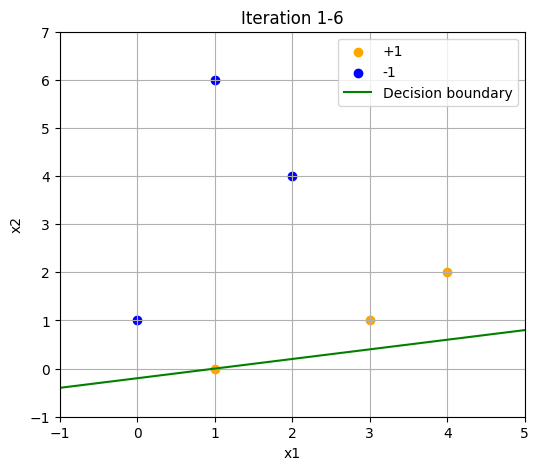

Iteration 2, Misclassified point 0: Updated weights: [ 2. -5.  0.]


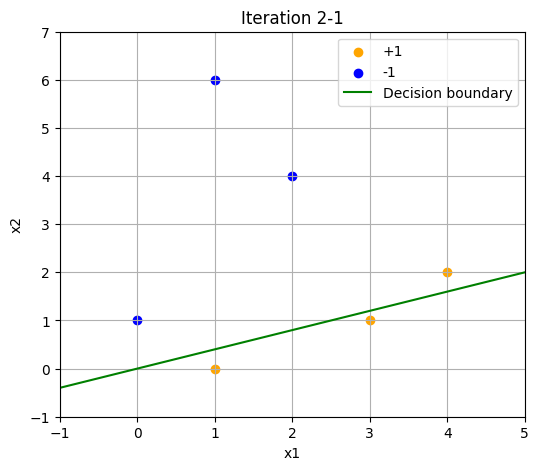

Iteration 2, Misclassified point 2: Updated weights: [ 6. -3.  1.]


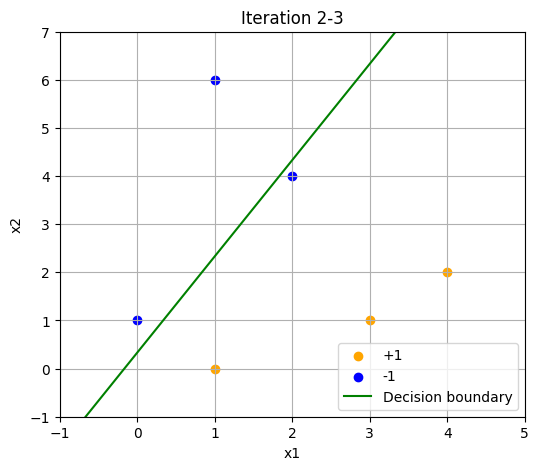

Iteration 2, Misclassified point 5: Updated weights: [ 4. -7.  0.]


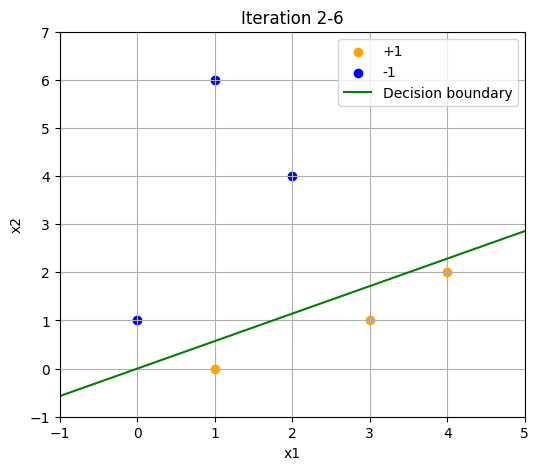

Training complete after 3 iterations.

Final weight vector: [ 4. -7.  0.]


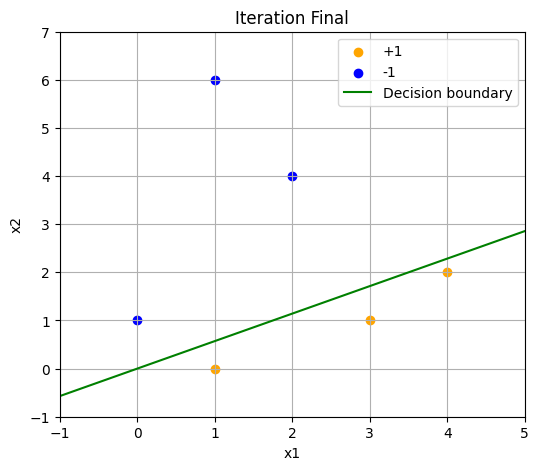

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dataset (homogeneous coordinates)
# -----------------------------
X = np.array([
    [1, 0, 1],  # x0
    [3, 1, 1],  # x1
    [4, 2, 1],  # x2
    [0, 1, 1],  # x3
    [1, 6, 1],  # x4
    [2, 4, 1],  # x5
])

y = np.array([1, 1, 1, -1, -1, -1])  # labels

# -----------------------------
# Initial weights
# -----------------------------
w = np.array([3, -1, 0], dtype=float)

# -----------------------------
# Plotting function
# -----------------------------
def plot_perceptron(X, y, w, iteration=None):
    plt.figure(figsize=(6,5))

    # Plot data points
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='orange', label='+1')
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='blue', label='-1')

    # Plot decision boundary
    x_vals = np.linspace(-1, 5, 100)
    if w[1] != 0:
        y_vals = -(w[0]*x_vals + w[2])/w[1]
        plt.plot(x_vals, y_vals, 'g-', label='Decision boundary')

    plt.xlim(-1,5)
    plt.ylim(-1,7)
    plt.xlabel('x1')
    plt.ylabel('x2')
    if iteration is not None:
        plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# Perceptron Training with Plot
# -----------------------------
def perceptron_train_plot(X, y, w, max_iter=10):
    n = X.shape[0]

    for it in range(max_iter):
        errors = 0
        for i in range(n):
            if y[i] * np.dot(w, X[i]) <= 0:
                w = w + y[i] * X[i]
                errors += 1
                print(f"Iteration {it+1}, Misclassified point {i}: Updated weights: {w}")
                plot_perceptron(X, y, w, iteration=f"{it+1}-{i+1}")
        if errors == 0:
            print(f"Training complete after {it+1} iterations.\n")
            break
    return w

# -----------------------------
# Train and plot
# -----------------------------
final_w = perceptron_train_plot(X, y, w)
print("Final weight vector:", final_w)
plot_perceptron(X, y, final_w, iteration='Final')


#Question 2
After the **1st iteration** of the perceptron training, the updated weight vector is:

w₁ = (1, −5, −1)

Which of the following data points are **misclassified**?

Options:
0  
1  
2  
3  
4

5

The misclassified data points after the **1st iteration** are:

✔ 1  
✔ 2


#Question 3

After the 1st iteration, some data points are misclassified.

What is the true label (yᵢₜ) of these misclassified points?

Options:
+1  
-1


Correct ans : +1

After the 1st iteration, the perceptron misclassifies two orange points.

Orange points belong to class +1.

Therefore, the true label yᵢₜ = +1 for the misclassified points.

#Question 4
Let us consider the data point **'2'**:

xᵢₜ = ⎡ 4  
        2  
        1 ⎤

For the next update to get **w₂**, what is **xᵢₜ · yᵢₜ** for the data point '2'?

Options:

⎡ -4  
  -2  
  -1 ⎤

⎡  4  
   2  
   1 ⎤


ans:
⎡ 4  
  2  
  1 ⎤


#Question 5
What is the new w₂, the value after doing one iteration on w₁ using the above-calculated xᵢₜ · yᵢₜ?

Options:

- ⎡  5  
  -3  
   0 ⎤


- ⎡ -3  
  -7  
  -2 ⎤


ans:

⎡  5  
  -3  
   0 ⎤


## Perceptron Update: Step-by-Step Explanation

### Step 1: Previous Weight Vector (w₁)

From the **first iteration**, the perceptron update was done using a misclassified data point with label **-1**.

- Initial weight:
\[
w_0 = \begin{bmatrix} 3 \\ -1 \\ 0 \end{bmatrix}
\]

- Misclassified point:
\[
x = \begin{bmatrix} 2 \\ 4 \\ 1 \end{bmatrix}, \quad y = -1
\]

- Update rule:
\[
w_1 = w_0 + y \cdot x
\]

- Calculation:
\[
w_1 =
\begin{bmatrix} 3 \\ -1 \\ 0 \end{bmatrix}
+
(-1)
\begin{bmatrix} 2 \\ 4 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 1 \\ -5 \\ -1 \end{bmatrix}
\]

---

### Step 2: New Misclassified Data Point

For the next iteration, consider **data point 2**:

\[
x_{it} = \begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix}
\]

- True label:
\[
y_{it} = +1
\]

---

### Step 3: Compute \( x_{it} \cdot y_{it} \)

\[
x_{it} \cdot y_{it}
=
(+1)
\begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix}
\]

---

### Step 4: Compute the Updated Weight Vector (w₂)

- Perceptron update rule:
\[
w_{t+1} = w_t + x_{it} \cdot y_{it}
\]

- Substitute values:
\[
w_2 =
\begin{bmatrix} 1 \\ -5 \\ -1 \end{bmatrix}
+
\begin{bmatrix} 4 \\ 2 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 5 \\ -3 \\ 0 \end{bmatrix}
\]

---

### ✅ Final Answer

\[
w_2 =
\begin{bmatrix}
5 \\
-3 \\
0
\end{bmatrix}
\]


# Multiclass Classification using Perceptrons

Until now, we have seen how a **single perceptron** performs **binary classification** by learning a linear decision boundary. However, perceptrons (especially when combined) can perform **much more complex tasks**, including **multiclass classification** and **non-linear decision making**.

---

## 1. Binary Classification vs Multiclass Classification

### 🔹 Binary Classification
- A **single perceptron** creates a **linear decision boundary**.
- In 2D space, this boundary is a **straight line**.
- The line separates the input space into **two regions**:
  - One side → class `+1`
  - Other side → class `-1`

---

## 2. Limitation of a Single Perceptron

- If data points are **linearly separable**, a single perceptron works perfectly.
- If data points are **not linearly separable** (e.g., one class is surrounded by another), a single perceptron **fails**.

Example:
- Blue points are sandwiched between red points.
- No single straight line can correctly separate all points.

---

## 3. Using Multiple Perceptrons

To overcome this limitation, we use **multiple perceptrons**.

### 🔹 AND Logic (Polygon Enclosure)
- Each perceptron creates one linear boundary.
- Combining multiple perceptrons using an **AND gate**:
  - Encloses a region (convex polygon)
  - Each side of the polygon is defined by one perceptron

Mathematically:



---

### 🔹 OR Logic (Multiple Polygons)
- If multiple disjoint regions belong to the same class:
- Combine multiple polygon outputs using an **OR gate**

Mathematically:



This allows classification of:
- Multiple clusters
- Non-contiguous regions
- Complex shapes

---

## 4. Universal Function Approximation

- By stacking perceptrons:
  - First layer → creates linear boundaries
  - Second layer → combines them using AND / OR logic
- In the extreme case:
  - Each data point can be enclosed by its own polygon
- This shows that perceptron networks can act as **universal function approximators**

---

## 5. Interpretation of the Given Images

### Image 1: Data Distribution
- Blue points lie between red clusters
- Not linearly separable
- Requires **multiple perceptrons**

### Image 2: OR Boundaries
- Each line represents a possible linear separation
- A single perceptron can only solve **part of the problem**
- Correct classification requires:
  - Multiple perceptrons
  - Logical combination of their outputs

---

## 6. Multiclass Classification Strategy

### 🔹 One-vs-Rest (OvR)
- Train one perceptron per class
- Each perceptron learns:
  - “Is this class or not?”

### 🔹 Hidden Layer Approach
- First layer learns intermediate boundaries
- Output layer combines them
- Enables complex multiclass decision regions

---

## 7. Key Takeaways

- A single perceptron → linear separation only
- Multiple perceptrons → polygonal and non-linear regions
- AND → region enclosure
- OR → multiple regions
- Networks of perceptrons enable **multiclass classification**

---

✅ **Conclusion:**  
Perceptrons become powerful when combined. While one perceptron is limited, a network of perceptrons can model highly complex decision boundaries and perform multiclass classification effectively.


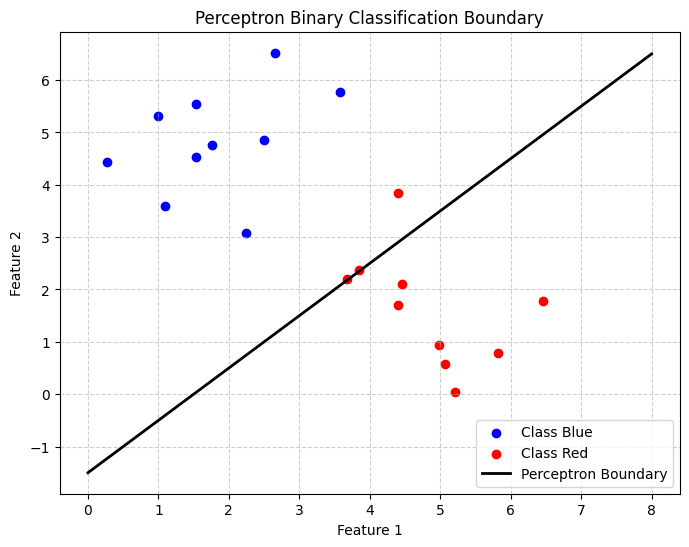

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data for two classes
np.random.seed(42)
blue_points = np.random.randn(10, 2) + [2, 5]  # Cluster 1 (Blue)
red_points = np.random.randn(10, 2) + [5, 2]   # Cluster 2 (Red)

# 2. Define the decision boundary line (The Perceptron's weight vector)
# Formula: w1*x + w2*y + b = 0  => y = (-w1/w2)x - (b/w2)
x_vals = np.linspace(0, 8, 100)
# Example weights: w1=1, w2=-1, b=-1.5 (creates a diagonal separator)
y_vals = x_vals - 1.5

# 3. Plotting
plt.figure(figsize=(8, 6))

# Plot the points
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Class Blue')
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Class Red')

# Plot the decision boundary
plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Perceptron Boundary')

# Formatting
plt.title("Perceptron Binary Classification Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## OR Gate using a Perceptron

A perceptron has **4 inputs**, each of which can be either **-1 or +1**.

- Weights:
  w₁ = w₂ = w₃ = w₄ = 1
- Bias = b
- Step function:
  - Output = +1 if (wᵀx + b) > 0
  - Output = -1 otherwise

The perceptron should behave like an **OR gate**, i.e.,  
it should output **+1 when at least one input is +1**.

Which value of **b** makes the perceptron work as an OR gate?

Options:
- b = 0  
- b = -4  
- b = 4  
- b = 1


Answer

b = 4


## Explanation: Why b = 4 Works for the OR Gate

We are designing a perceptron to behave like an **OR gate**.

---

### 🔹 Given
- Inputs: x₁, x₂, x₃, x₄ ∈ {−1, +1}
- Weights:  
  w₁ = w₂ = w₃ = w₄ = 1
- Perceptron rule:
  - Output = +1 if (wᵀx + b) > 0
  - Output = −1 otherwise

---

### 🔹 OR Gate Condition
- Output should be **+1** if **at least one input is +1**
- Output should be **−1** only when **all inputs are −1**

---

### 🔹 Case 1: All inputs are −1


## Explanation Cases: OR Gate Perceptron

### Case 1: All inputs are -1
- Input vector: x = [-1, -1, -1, -1]  
- Weighted sum: wᵀx = -4  
- Perceptron output should be -1 (OR gate)  
- Condition: -4 + b ≤ 0 → b ≤ 4

---

### Case 2: At least one input is +1
- Example input vector: x = [1, -1, -1, -1]  
- Weighted sum: wᵀx = -2  
- Perceptron output should be +1 (OR gate)  
- Condition: -2 + b > 0 → b > 2

---

### Value should be lie between : 2 < b ≤ 4


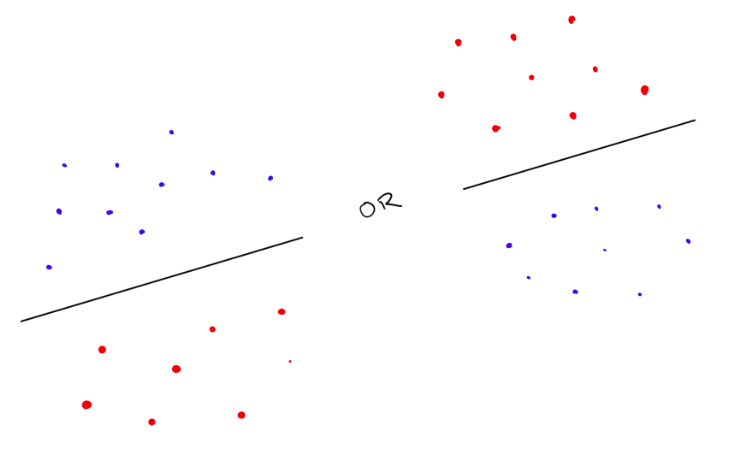

## Question: Minimum Number of Perceptrons

Consider a multiclass classification scenario where multiple linear boundaries are needed to separate clusters of points.  

What is the **minimum number of perceptrons** required to correctly classify all the points in the figure?

Options:
- 1  
- 2  
- 4  
- More than 4


Answer : 2

Explanation

- A **single perceptron** creates only one linear boundary.  
- In the given figure, **some points of one class are sandwiched between points of another class**, so one line is insufficient.  
- To correctly separate the clusters, **two linear boundaries (two perceptrons)** are enough:  
  - Each perceptron creates a line to isolate a cluster.  
  - Their combination classifies all points correctly.  
- Therefore, the **minimum number of perceptrons required = 2**.
